In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding


In [ ]:
# Load the IMDB dataset with 10,000 most frequent words
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure uniform input length
max_len = 500  # Maximum length of each review (after padding)
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

# Check the shape of the data
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [ ]:
# Build the RNN model
model = Sequential()

# Embedding layer to represent words as dense vectors
model.add(Embedding(max_words, 32, input_length=max_len))

# Add SimpleRNN layer
model.add(SimpleRNN(32))

# Add a Dense layer for output (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model for 5 epochs with batch size of 64
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=2)


Epoch 1/5
313/313 - 45s - 145ms/step - accuracy: 0.7515 - loss: 0.4970 - val_accuracy: 0.8438 - val_loss: 0.3678
Epoch 2/5
313/313 - 82s - 262ms/step - accuracy: 0.8656 - loss: 0.3256 - val_accuracy: 0.7136 - val_loss: 0.5574
Epoch 3/5
313/313 - 81s - 258ms/step - accuracy: 0.8846 - loss: 0.2850 - val_accuracy: 0.8538 - val_loss: 0.3564
Epoch 4/5
313/313 - 82s - 261ms/step - accuracy: 0.9392 - loss: 0.1673 - val_accuracy: 0.8266 - val_loss: 0.4146
Epoch 5/5
313/313 - 83s - 264ms/step - accuracy: 0.9682 - loss: 0.0999 - val_accuracy: 0.8302 - val_loss: 0.5031


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8274 - loss: 0.5121
Test Accuracy: 83.07%


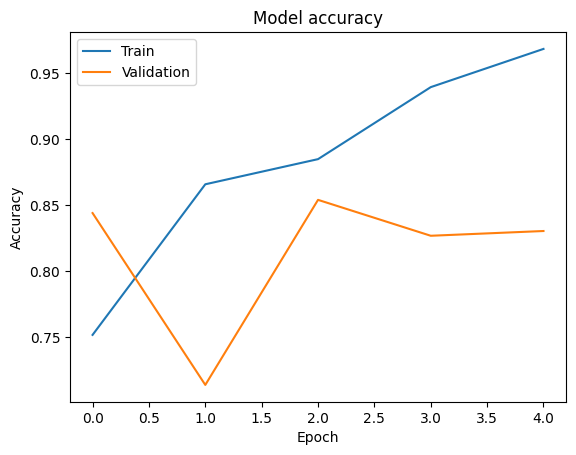

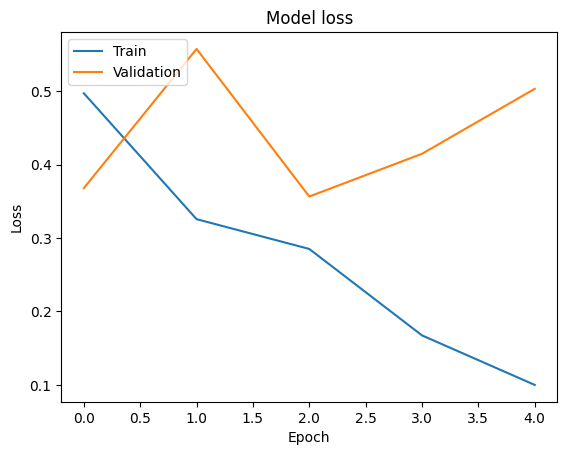

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()